In [40]:
import xarray as xr
import pandas as pd
import numpy as np
import os
import netCDF4
import xarray as xr
import glob
from matplotlib import pyplot as plt

In [2]:
### import some analysis functions we wrote for this project
import sys ; sys.path.append("../../ppe_tools")
from ppe_tools import Ensemble,Member,ParamInfo
from ppe_tools.utils import *

In [105]:
df=pd.read_csv('test.csv')

In [106]:
include=df.final.values=='1'

In [107]:
ranges={}
for p in df.name[include].values:
    ix=df.name==p
    ranges[p]=[float(df[m][ix].values) for m in ['min','max']]
ranges

{'kmax': [3e-09, 3.8e-08], 'psi50': [275000.0, 700000.0]}

In [108]:
nparams=len(ranges)
nx    = 100
nper  = int(np.round(nx**(1/len(ranges))))
nx = nper**len(ranges)
samples=[[*str(np.base_repr(i,nper)).zfill(nparams)] for i in range(nx)]

In [109]:
vals={}
for i,p in enumerate(ranges):
    ls=np.linspace(ranges[p][0],ranges[p][1],nper)
    vals[p]=[ls[int(s[i])] for s in samples]

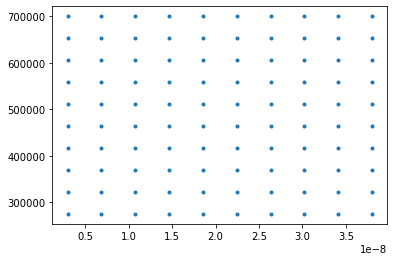

In [135]:
plt.plot(vals['kmax'],vals['psi50'],'.');

In [ ]:
## CREATE and EDIT the new paramfile
cmd = 'cp '+self._basefile+' '+pfile
os.system(cmd)
dset = netCDF4.Dataset(pfile,'r+')
for param in ranges:

    dset[param][:] = self._paramdict[param].value
dset.close()

In [116]:
pdir='/glade/scratch/djk2120/PPEn11/amflx_lhc/paramfiles/'
basefile=pdir+'basefile.nc'

In [125]:
for i in range(nx):
    k='a'+str(i+1).zfill(3)
    pfile=pdir+k+'.nc'
    cmd = 'cp '+basefile+' '+pfile
    os.system(cmd)
    dset = netCDF4.Dataset(pfile,'r+')
    for param in ranges:
        dset[param][:] = vals[param][i]
    dset.close()

In [130]:
## check that the pfiles look correct
dvs=[p for p in ranges]
def preprocess(ds):
    return ds[dvs]
files = sorted(glob.glob(pdir+'a*.nc'))
ds = xr.open_mfdataset(files,combine='nested',concat_dim='ens',preprocess=preprocess)



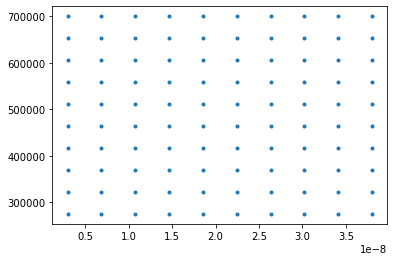

In [136]:
plt.plot(ds.kmax.isel(segment=0,pft=1),ds.psi50.isel(segment=0,pft=1),'.');